In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv("Book1.csv")  ##used to retrive data from excel,, Read a comma-separated values (csv) file into DataFrame CSV file format is a bounded text document that uses a comma to distinguish the values

In [3]:
housing.head()

,CRIM,ZN,INDUS,TOP,NOX,SS,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MP
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    505 non-null    float64
 3   TOP      506 non-null    int64  
 4   NOX      505 non-null    float64
 5   SS       502 non-null    float64
 6   AGE      504 non-null    float64
 7   DIS      505 non-null    float64
 8    RAD     505 non-null    float64
 9   TAX      505 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MP       506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


from sklearn.model_selection import train_test_split  ## here we import direct function
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42) ## these used to spit out data set into trainee data                                                                                                                  and test data

In [5]:
housing['TOP'].value_counts()

0    471
1     35
Name: TOP, dtype: int64

In [6]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt

array([[<AxesSubplot: title={'center': 'CRIM'}>,
        <AxesSubplot: title={'center': 'ZN'}>,
        <AxesSubplot: title={'center': 'INDUS '}>,
        <AxesSubplot: title={'center': 'TOP'}>],
       [<AxesSubplot: title={'center': 'NOX'}>,
        <AxesSubplot: title={'center': 'SS'}>,
        <AxesSubplot: title={'center': 'AGE'}>,
        <AxesSubplot: title={'center': 'DIS'}>],
       [<AxesSubplot: title={'center': ' RAD '}>,
        <AxesSubplot: title={'center': 'TAX'}>,
        <AxesSubplot: title={'center': 'PTRATIO'}>,
        <AxesSubplot: title={'center': 'B '}>],
       [<AxesSubplot: title={'center': 'LSTAT'}>,
        <AxesSubplot: title={'center': 'MP'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

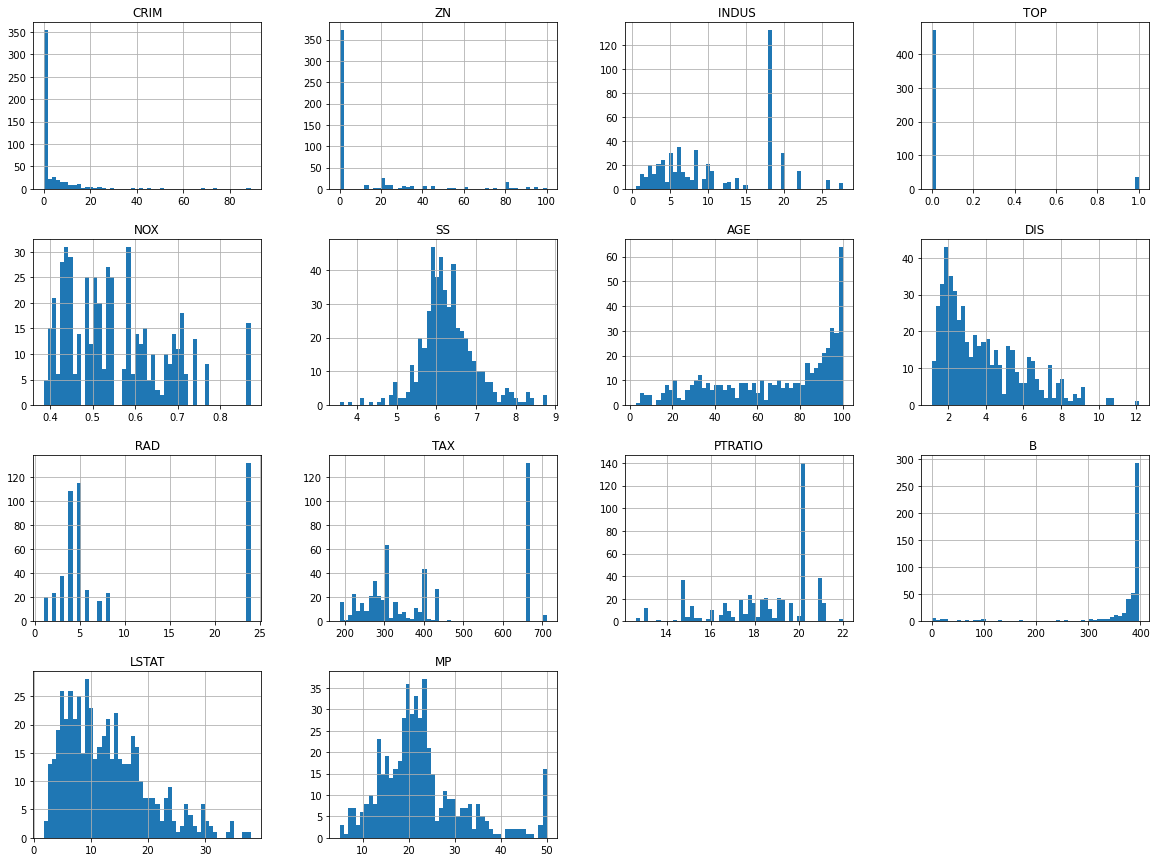

In [8]:
housing.hist(bins=50, figsize=(20,15))

In [9]:

from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)              ## this whole is used to split data over training set and testing set equally here we we have important feature CHAS so we have to distribute it becouse if a perticular value comes in larger amount in trainee data set then our model behave different
for train_index,test_index in split.split(housing,housing['TOP']):
    start_train_set = housing.loc[train_index]
    start_test_set = housing.loc[test_index]

#  see above example of equal distribution of feature TOP in trainee and tasting data set

In [10]:
start_train_set['TOP'].value_counts()

0    376
1     28
Name: TOP, dtype: int64

In [11]:
start_test_set['TOP'].value_counts()

0    95
1     7
Name: TOP, dtype: int64

In [12]:
3076/28


109.85714285714286

In [13]:
95/7

13.571428571428571

In [14]:
housing= start_train_set.copy()

# looking for corelations

In [15]:
corr_matrix=housing.corr()        ## this used to create corelation martrix   this gives pearsion corelation cofficent
                                       ##  pearsion corelation cofficent :: give by increasing the value of feature other feature value increse or decrase
                                      ## varies b/w -1 to +1   matlab value kiska kitna effect hoga   
                                                                   ## negative ha to decrease hoga positive ha to increase hoga value of feature increase karne pa

In [16]:
corr_matrix["MP"].sort_values(ascending=False) ## we find effect of other features on MP 
                                               ## Mp ka MP pa 1 ha to pura influence ha
                                                     ## RM ka MP  0.695360 ha 

MP         1.000000
SS         0.679975
B          0.361580
ZN         0.339741
DIS        0.240451
TOP        0.205066
AGE       -0.364596
 RAD      -0.375385
CRIM      -0.393715
NOX       -0.423025
TAX       -0.457871
INDUS     -0.474301
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MP, dtype: float64

array([[<AxesSubplot: xlabel='MP', ylabel='MP'>,
        <AxesSubplot: xlabel='SS', ylabel='MP'>,
        <AxesSubplot: xlabel='ZN', ylabel='MP'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='MP'>],
       [<AxesSubplot: xlabel='MP', ylabel='SS'>,
        <AxesSubplot: xlabel='SS', ylabel='SS'>,
        <AxesSubplot: xlabel='ZN', ylabel='SS'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='SS'>],
       [<AxesSubplot: xlabel='MP', ylabel='ZN'>,
        <AxesSubplot: xlabel='SS', ylabel='ZN'>,
        <AxesSubplot: xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot: xlabel='MP', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='SS', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

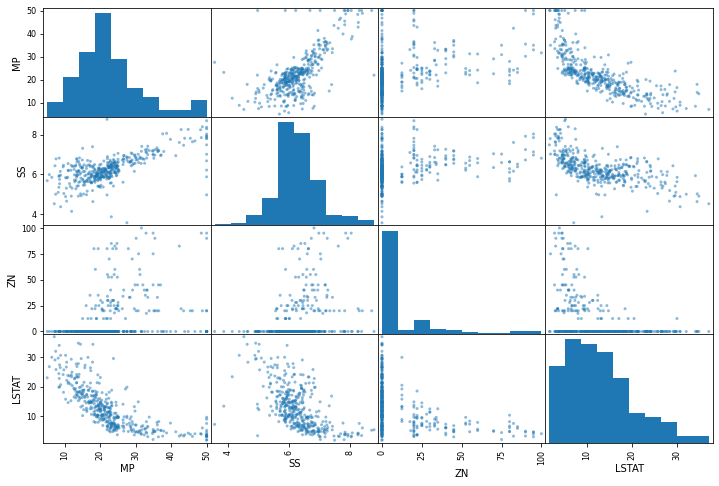

In [17]:
from pandas.plotting import scatter_matrix
attributes=["MP","SS","ZN","LSTAT"]                                  ## used to ploat graph but we will see it latter
scatter_matrix(housing[attributes],figsize=(12,8))

# Missing Attributes(if some feature have a missing values like if DIS have 501 values and TAX ha 506 values)

In [18]:
## we have three ways
# 1. get rid of missing data points
# 2.get rid of whole attribute
# 3.set the valus either (0,mean or median)
# 4.try to create seprate model. 

In [19]:
a=housing.dropna(subset=["SS"])      #option 1    this will not change in original data frame housing but made changes and put in a
a.shape                                         #  and housig data frame is unchanged                                

(400, 14)

In [20]:
a=housing.drop("SS",axis=1) 
a.shape                                      #option 2 this will not change in original data frame housing but made changes and put in a
                                       #  and housig data frame is unchanged

(404, 13)

In [21]:
# we simply use function for above step for missing data
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")                                                       ## through this code we compute median for all the features and put it in a                                                         ##
imputer.fit(housing)                                                            ## imputer runes afunction fit and put all the meadian in arrray name statistics_
                                                           
                                                     




SimpleImputer(strategy='median')

In [22]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21750e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90960e+02, 1.15700e+01, 2.11500e+01])

In [23]:
x=imputer.transform(housing)      ## as it fills the vacent value and array of value of features
                                          # now to display it we have to convert it into frame 
                                        ## as it is gives numpy array

In [24]:
housing_c=pd.DataFrame(x,columns=housing.columns)  ## perameters are array and heading of all the features

In [25]:
housing_c.describe()

,CRIM,ZN,INDUS,TOP,NOX,SS,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MP
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.349307,0.069307,0.558064,6.282173,69.039851,3.746210,9.737624,412.415842,18.473267,353.645223,12.791609,22.509406
std,8.099383,22.150636,6.876339,0.254290,0.116875,0.712232,28.258248,2.099057,8.729771,168.632731,2.129243,96.033556,7.235740,9.385531
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.702500,6.847500,16.600000
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.217500,78.200000,3.122200,5.000000,337.000000,19.000000,390.960000,11.570000,21.150000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


# Scikit-learn Design it is module

In [26]:
#primarily ,three types of objects                               see later
#1.Estimators-

In [27]:
housing =start_train_set.drop("MP",axis=1)
housing_label=start_train_set["MP"].copy()

# # feature Scaling 

In [28]:
##To interpret these features on same scale we need to perform feaure scaling
##means making values of features in a same scale(same range)
#two ways to doing it
#1.Min-max scaling or normalization
   #  (value-min)/(max-min)
    #Sklearn provides A class for this called MinMaxScalar
#2. Standardization
    #(value-mean)/std                        (standerd deviation)
    #Sklearn provides A class for this called Standard Scaler for this

# Creating a pipeline
## means kuch esa kam karna ki apan model ko automate kar sake ,series of steps kar sake

In [29]:
## all this things like filling the missing data ,feature scaling we can put in pipeline As we all have to in a pipeline not as we do above

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.impute import SimpleImputer                                                           
my_pipeline=Pipeline([
            ('imputer',SimpleImputer(strategy="median")),
            #...add as many things that you want
             ('std_scaler',StandardScaler()), 
])             

In [31]:
housing_num_tr=my_pipeline.fit_transform(housing)

In [32]:
housing_num_tr                        ## nump array

array([[-0.43942006,  3.12628155, -1.12252553, ..., -0.97491834,
         0.40916362, -0.86091034],
       [-0.44352175,  3.12628155, -1.35986419, ..., -0.69277865,
         0.38883304, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98294508, ...,  0.81196637,
         0.44377774,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23173043, ..., -0.22254583,
         0.41583622, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98294508, ...,  0.81196637,
        -3.15619448,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.36994153, ..., -0.97491834,
         0.40822529,  0.09940681]])

## choosing differnent ml models

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
##model=RandomForestRegressor()
model=DecisionTreeRegressor()
model.fit(housing_num_tr,housing_label) ## numpy array takes as a perameter

DecisionTreeRegressor()

In [34]:
## here we have to check prediction before apply on test data we check with some small trainee data


In [35]:
some_data= housing.iloc[:5]


In [36]:
some_labels=housing_label[:5]

In [37]:
prepared_data=my_pipeline.transform(some_data)

In [38]:
model.predict(prepared_data)

array([21.9, 24.5, 16.7, 23.1, 23. ])

In [39]:
## check prediction with our labels of trainee data 


In [40]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [41]:
from sklearn.metrics import mean_squared_error
import numpy as np
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_label,housing_predictions)
rmse=np.sqrt(mse)

In [42]:
rmse

0.0

## better evalusion technique coss validation


In [43]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,housing_num_tr,housing_label,scoring="neg_mean_squared_error",cv=10)
rmse_score=np.sqrt(-score)

In [44]:
def print_score(scores):
    print("rmse_score",scores)
    print("mean",scores.mean())
    print("standard deviation",scores.std())
    

In [45]:
print_score(rmse_score)

rmse_score [3.90721659 5.75313276 5.30921886 4.03983216 4.06589474 2.80298948
 6.77065359 3.9766506  3.28481354 3.68758051]
mean 4.359798281850965
standard deviation 1.1500659218045703


In [46]:
## saving the ml model we select random forest model

In [47]:
from joblib import dump, load
dump(model, 'savemodel.joblib')

['savemodel.joblib']

In [48]:
X_testdata =start_test_set.drop("MP",axis=1)
Y_testresult=start_test_set["MP"].copy()
X_testdata_t = my_pipeline.transform(X_testdata)
X_predict=model.predict(X_testdata_t)
mse=mean_squared_error(Y_testresult,X_predict)
rmse=np.sqrt(mse)




In [49]:
rmse

4.34023582986265

In [50]:
X_predict

array([30.5, 10.9, 29. , 23.3, 20. , 13.9, 22.4, 11.5, 28.7, 43.5, 21.7,
       10.9, 23.1, 23.1, 19. , 11.3, 28.7, 15.6, 23.1, 16.6, 23. , 14.3,
       10.9, 21.7, 16.1, 35.1, 17.1, 35.1, 10.2, 28.7, 18.5, 19.3, 22.6,
       10.9, 18.5,  8.3, 48.8, 21.2, 24.6, 46. , 25. , 22.8, 22.8, 19.6,
       14.3, 31.7, 48.3, 19. , 21.9, 18.6, 19.4, 13.1, 22.4, 17.1, 28.6,
       31.7, 37.6, 31.5, 18.3, 19.9, 50. ,  6.3, 17.5, 28.7, 18.1, 28.7,
       17.4, 13.4, 22.7, 35.4, 22.5, 22.6, 16. , 23.9, 34.7, 12.7, 15.6,
       19.6, 21. , 19.9, 22.9, 19.9, 13.4, 20.5, 26.4, 21. ,  8.7, 23.1,
       25. , 23.2, 20.2, 22. ,  5.6, 29.1, 21.9, 30.1, 16.2, 34.7,  8.5,
       28.6, 22. , 18.8])

In [51]:
Y_testresult

342    16.5
379    10.2
223    30.1
219    23.0
48     14.4
       ... 
88     23.6
466    19.0
52     25.0
121    20.3
218    21.5
Name: MP, Length: 102, dtype: float64

In [52]:
import pickle

In [53]:
pickle.dump(housing_num_tr, open('modlml.pk1','wb'))